# Experiment: Tau Sweep Previous Violation

**Goal**: Sweep over a range of tau values to find the tau (exponential decay constant) of best fit for creating a previous violation history regressor for each animal.


> Written by Jess Breda 

## Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from multiglm.experiments.experiment import load_experiment
from multiglm.experiments.experiment_tau_sweep import ExperimentTauSweep
from multiglm.models.multiclass_logistic_regression import MultiClassLogisticRegression
from multiglm.features.design_matrix_generator import DesignMatrixGeneratorFilteredHistory
from multiglm.visualizations.model_visualizer import ModelVisualizerTauSweep
from multiglm.data import ANIMAL_IDS

sns.set_context("talk")
%load_ext autoreload
%autoreload 2

## Model Configs

In [2]:
model_config = {
    "tau_sweep_prev_violation": {
        "model_class": MultiClassLogisticRegression,
        "model_type": "multi",
        "design_matrix_generator": DesignMatrixGeneratorFilteredHistory,
        "design_matrix_generator_args": {"interaction_pairs": None},
    }
}
params = {
    "animals": ANIMAL_IDS,
    "data_type": "new_trained",
    "model_config": model_config,
    "sigmas": [0.07, 0.13, 0.25, 0.5, 1, 2, 4, 8, 16],
    "taus": [0.51, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 40, 50, 100],
    "random_state": 47,
    "eval_train": True,
    "tau_sweep": {
        "prev_violation": True,
    },
}
save_name = "2024_02_16_tau_sweep_prev_violation.pkl"

## Run

In [3]:
experiment = ExperimentTauSweep(params)
experiment.run()
experiment.save(save_name)

Loading dataset type : new_trained
Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']

 >>>> evaluating animal W051 sweeping taus of prev_violation <<<<

 ***** evaluating tau 0.51, sigma 0.07 *****
Optimization terminated successfully.
         Current function value: 64798.744420
         Iterations: 27
         Function evaluations: 41
         Gradient evaluations: 41

 ***** evaluating tau 0.51, sigma 0.13 *****
Optimization terminated successfully.
         Current function value: 64544.632385
         Iterations: 28
         Function evaluations: 42
         Gradient evaluations: 42

 ***** evaluating tau 0.51, sigma 0.25 *****
         Current function value: 64466.238677
         Iterations: 27
         Function evaluations: 102
         Gradient evaluations: 97

 ***** evaluating tau 0.51, sigma 0.5 *****
         Current function value: 64444.215881
         It

## Visualize

In [4]:
experiment = load_experiment(save_name)
mv = ModelVisualizerTauSweep(experiment)

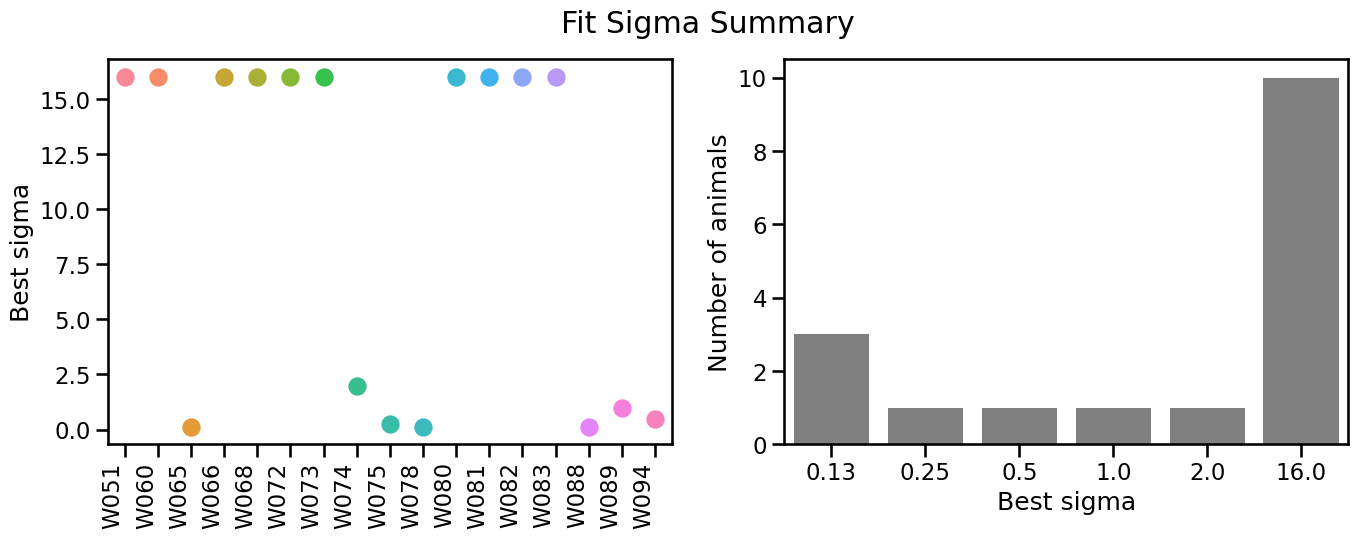

In [5]:
mv.plot_sigma_summary()

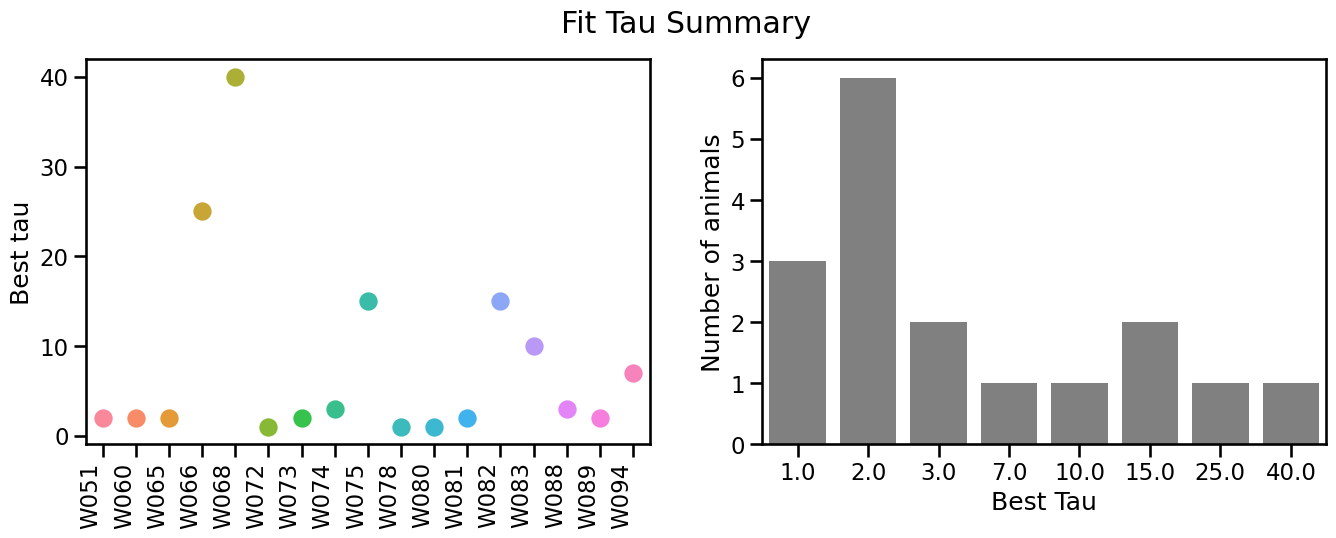

In [6]:
mv.plot_tau_summary()

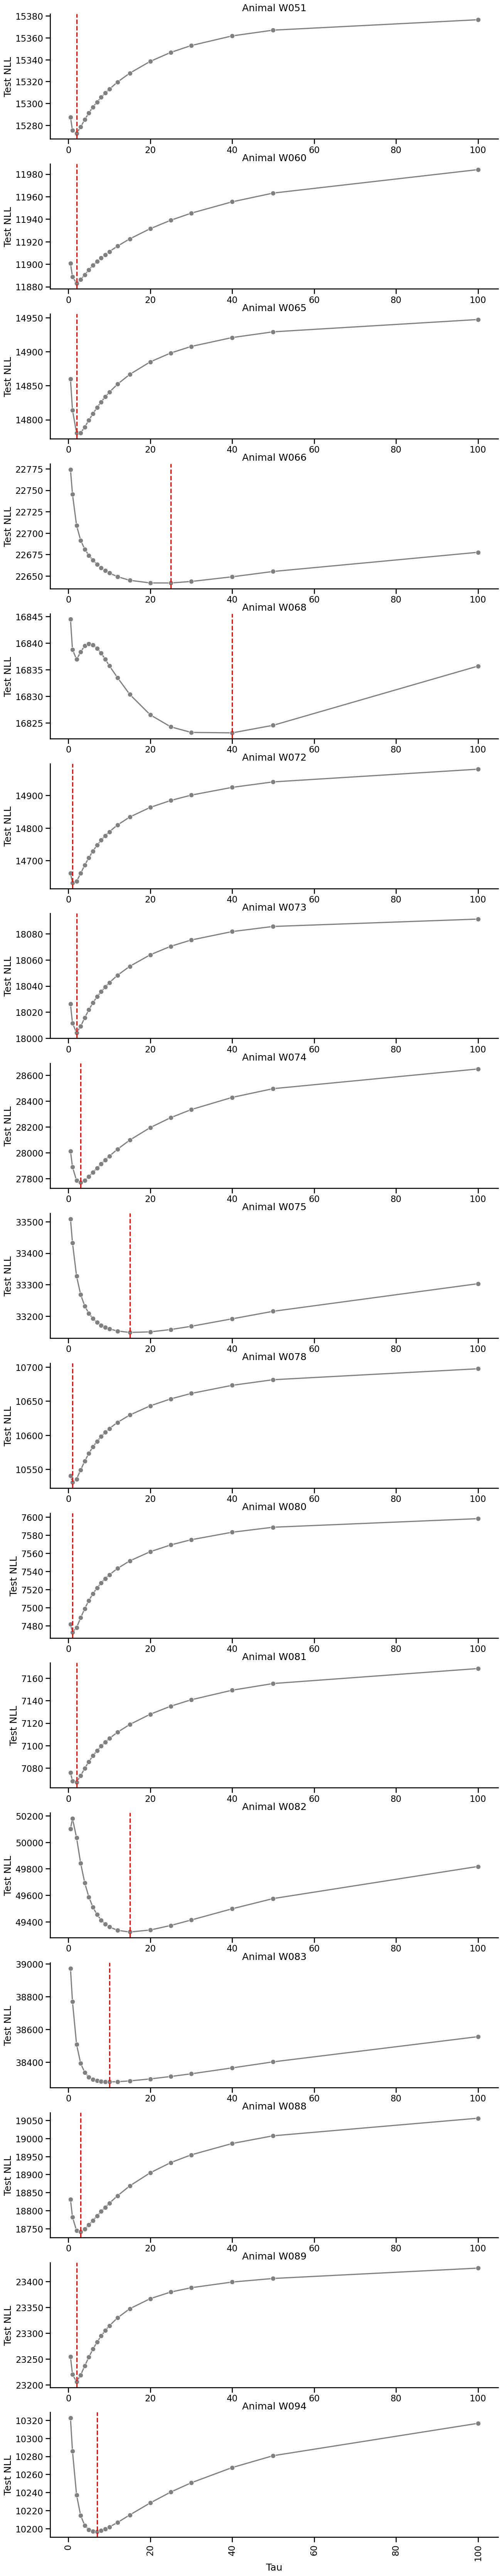

In [7]:
mv.plot_nll_over_taus_by_animal(group="tau", color="gray")

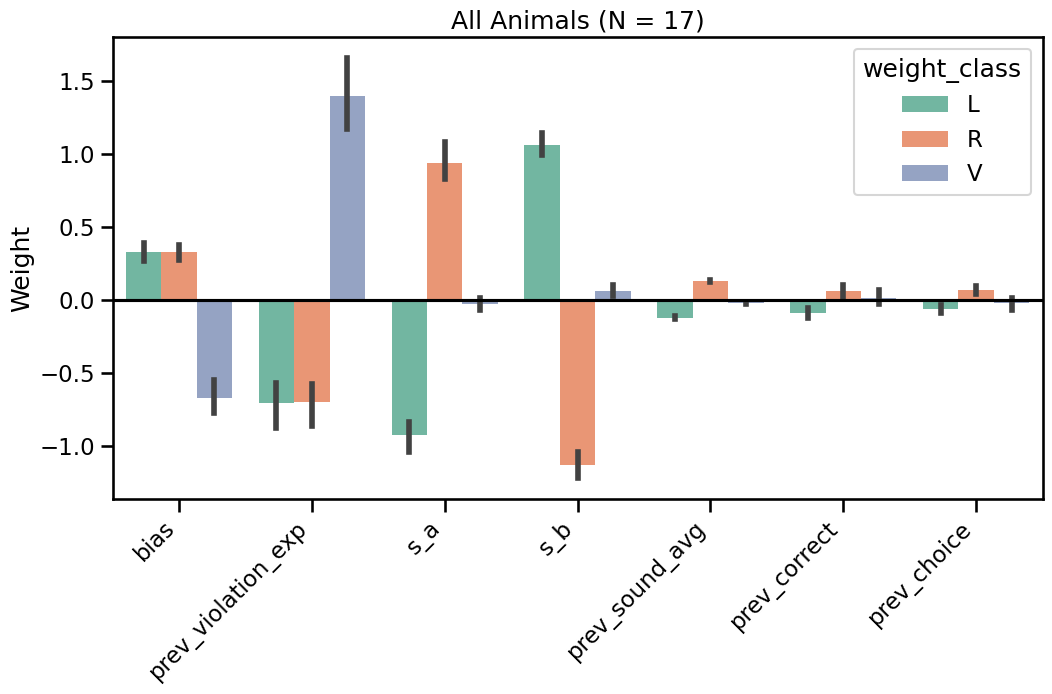

In [8]:
order = [
    "bias",
    "prev_violation_exp",
    "s_a",
    "s_b",
    "prev_sound_avg",
    "prev_correct",
    "prev_choice",
]
mv.plot_weights_summary(palette="Set2", order=order)

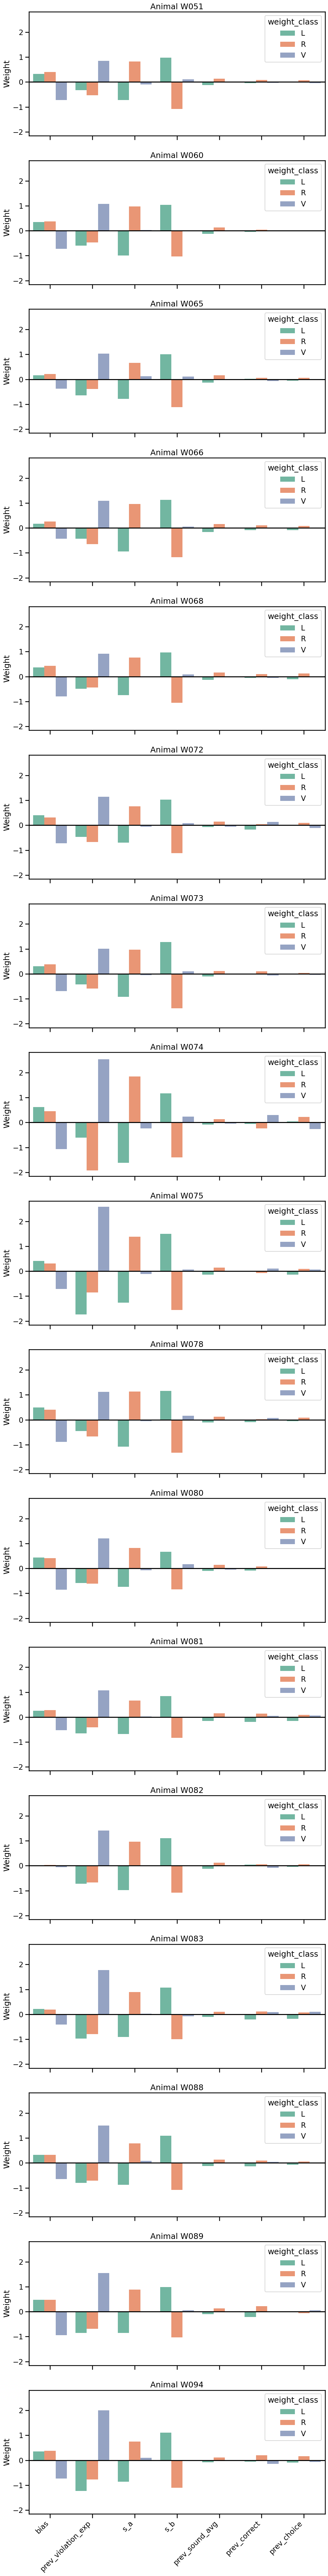

In [9]:
mv.plot_weights_by_animal(palette="Set2", order=order)

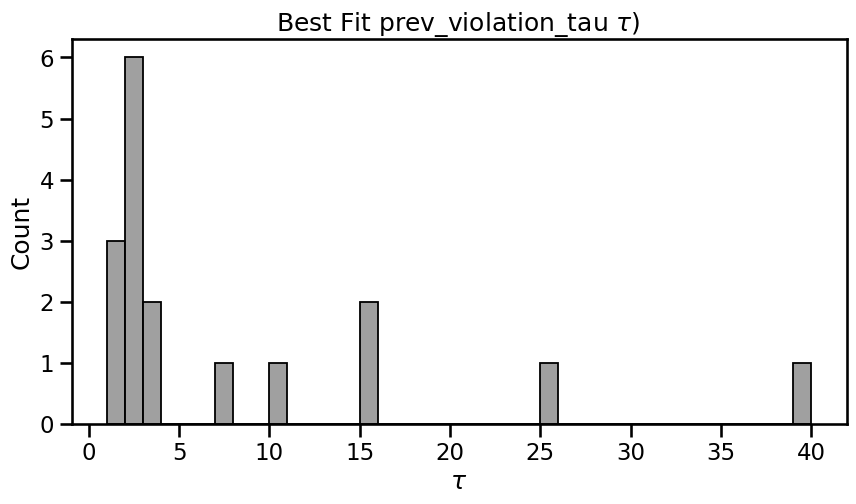

In [15]:
mv.plot_tau_histogram(column="prev_violation_tau", binwidth=1)

In [11]:
prev_violation_history_weights = (
    mv.unpack_features_and_weights(mv.find_best_fit(group="animal_id"))
    .query('feature == "prev_violation_exp" and weight_class == "V"')[
        ["animal_id", "sigma", "feature", "weight", "prev_violation_tau"]
    ]
    .reset_index()
)

prev_violation_history_weights.head()

,index,animal_id,sigma,feature,weight,prev_violation_tau
0,244,W051,16.00,prev_violation_exp,0.854792,2.0
1,251,W060,16.00,prev_violation_exp,1.068390,2.0
2,258,W065,0.13,prev_violation_exp,1.028606,2.0
3,265,W066,16.00,prev_violation_exp,1.084039,25.0
4,272,W068,16.00,prev_violation_exp,0.916764,40.0


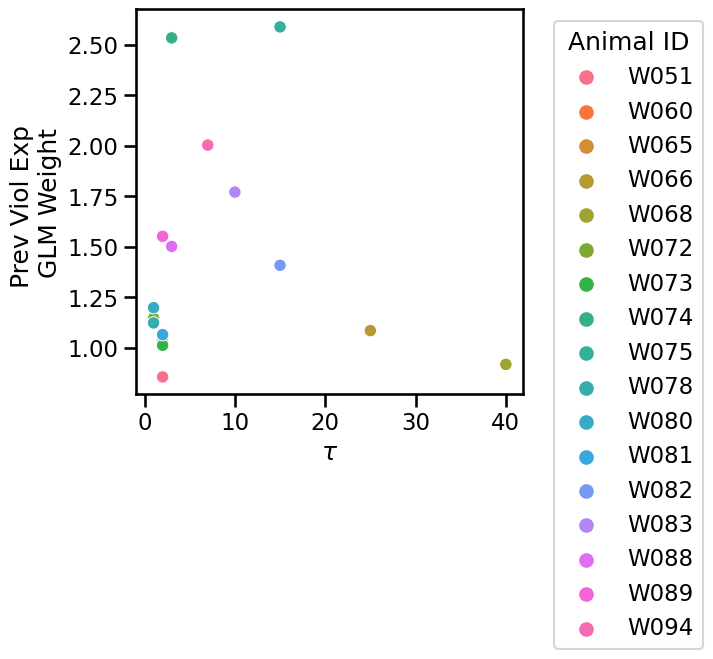

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.scatterplot(
    data=prev_violation_history_weights,
    x="prev_violation_tau",
    y="weight",
    hue="animal_id",
    ax=ax,
)

ax.set(
    xlabel="$\\tau$",
    ylabel="Prev Viol Exp \nGLM Weight",
)

ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Animal ID")

## Save Out

In [14]:
prev_violation_history_weights.to_csv(
    "../data/processed/tau_sweeps/prev_violation_history_weights.csv", index=False
)

tau_df = mv.find_best_fit(group="animal_id")[["animal_id", "prev_violation_tau"]]
tau_df.to_csv("../data/processed/tau_sweeps/taus_df.csv", index=False)
tau_df.head()

,animal_id,prev_violation_tau
0,W051,2.0
1,W060,2.0
2,W065,2.0
3,W066,25.0
4,W068,40.0
